In [64]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from nltk.tokenize import word_tokenize
from nltk import sent_tokenize


In [2]:
names = ["id","auteur","lien_auteur","nom_auteur","reclamation_examinee","date_examination","source","lien","pub_nom_auteur","pub_lien_auteur",
         "date_publication","contenu","extra_auteur","extra_contenu","extra_publication_examinée",
         "extra_mot_cle","extra_lien_reference","extra_tags","extra_titre","note_nom_alternatif","meilleure_note",
         "valeur_note","pire_note"]
df = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 1, nrows = 5000)
df2 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 5001, nrows = 5000)
df3 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 10001, nrows = 5000)
df4 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 15001, nrows = 5000)




In [3]:
df = pd.concat([df, df2])
df = pd.concat([df, df3])
df = pd.concat([df, df4])
display(df.sample(5))


,id,auteur,lien_auteur,nom_auteur,reclamation_examinee,date_examination,source,lien,pub_nom_auteur,pub_lien_auteur,...,extra_contenu,extra_publication_examinée,extra_mot_cle,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif,meilleure_note,valeur_note,pire_note
998,998,NaN,snopes,NaN,"Monica Lewinsky offered to """"take one for (the...",2019-10-04,snopes,https://www.snopes.com/fact-check/monica-lewin...,NaN,NaN,...,"[{""id"" : 19948"",""""begin"": 55,""end"": 70,""entity...","[{""id"" : 19948"",""""begin"": 0,""end"": 15,""entity""...",[],https://www.snopes.com/tachyon/2019/10/monica-...,NaN,Did Monica Lewinsky Offer to ‘Take One For (th...,False,NaN,NaN,NaN
670,15670,NaN,snopes,NaN,"Monica Lewinsky offered to """"take one for (the...",2019-10-04,snopes,https://www.snopes.com/fact-check/monica-lewin...,NaN,NaN,...,"[{""id"" : 19948"",""""begin"": 55,""end"": 70,""entity...","[{""id"" : 19948"",""""begin"": 0,""end"": 15,""entity""...",[],https://www.snopes.com/tachyon/2019/10/monica-...,NaN,Did Monica Lewinsky Offer to ‘Take One For (th...,False,NaN,NaN,NaN
1551,6551,NaN,snopes,NaN,The Southern Baptist Convention purchased fast...,2016-12-09,snopes,https://www.snopes.com/fact-check/southern-bap...,NaN,NaN,...,"[{""id"" : 50780010"",""""begin"": 23,""end"": 34,""ent...","[{""id"" : 117407"",""""begin"": 4,""end"": 31,""entity...","[{""id"" : 50780010"",""""begin"": 4,""end"": 15,""enti...",http://www.bpnews.net/38271,the babylon bee,Did the Southern Baptist Convention Buy Chick ...,Labeled Satire,NaN,NaN,NaN
224,15224,NaN,snopes,NaN,"Monica Lewinsky offered to """"take one for (the...",2019-10-04,snopes,https://www.snopes.com/fact-check/monica-lewin...,NaN,NaN,...,"[{""id"" : 19948"",""""begin"": 55,""end"": 70,""entity...","[{""id"" : 19948"",""""begin"": 0,""end"": 15,""entity""...",[],https://www.snopes.com/tachyon/2019/10/monica-...,NaN,Did Monica Lewinsky Offer to ‘Take One For (th...,False,NaN,NaN,NaN
4322,14322,NaN,snopes,NaN,NASA and NOAA faked climate data in the GISTEM...,2019-10-03,snopes,https://www.snopes.com/fact-check/global-warmi...,NaN,NaN,...,"[{""id"" : 7529378"",""""begin"": 65,""end"": 73,""enti...","[{""id"" : 18426568"",""""begin"": 0,""end"": 4,""entit...",[],https://www.buzzfeednews.com/article/stephanie...,NaN,Was Global Warming Data ‘Faked’ to ‘Fit Climat...,False,NaN,NaN,NaN


In [4]:
display(df.shape)

(20000, 23)

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          20000 non-null  int64  
 1   auteur                      0 non-null      float64
 2   lien_auteur                 20000 non-null  object 
 3   nom_auteur                  0 non-null      float64
 4   reclamation_examinee        20000 non-null  object 
 5   date_examination            19598 non-null  object 
 6   source                      20000 non-null  object 
 7   lien                        20000 non-null  object 
 8   pub_nom_auteur              1525 non-null   object 
 9   pub_lien_auteur             113 non-null    object 
 10  date_publication            1525 non-null   object 
 11  contenu                     19997 non-null  object 
 12  extra_auteur                20000 non-null  object 
 13  extra_contenu               2000

None

On supprime toutes les colonnes qui ou toutes les lignes sont Nan 

In [6]:
del df["auteur"]
del df["nom_auteur"]
del df["pub_nom_auteur"]
del df["pub_lien_auteur"]
del df["date_publication"]
del df["meilleure_note"]
del df["valeur_note"]
del df["pire_note"]

In [7]:
display(df.sample(5))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_auteur,extra_contenu,extra_publication_examinée,extra_mot_cle,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
2083,12083,snopes,NASA and NOAA faked climate data in the GISTEM...,2019-10-03,snopes,https://www.snopes.com/fact-check/global-warmi...,"Since 2014, climate-change deniers have squeez...",[],"[{""id"" : 7529378"",""""begin"": 65,""end"": 73,""enti...","[{""id"" : 18426568"",""""begin"": 0,""end"": 4,""entit...",[],https://www.buzzfeednews.com/article/stephanie...,NaN,Was Global Warming Data ‘Faked’ to ‘Fit Climat...,False
950,5950,snopes,"Monica Lewinsky offered to """"take one for (the...",2019-10-04,snopes,https://www.snopes.com/fact-check/monica-lewin...,"On Oct. 3, 2019, an image supposedly showing a...",[],"[{""id"" : 19948"",""""begin"": 55,""end"": 70,""entity...","[{""id"" : 19948"",""""begin"": 0,""end"": 15,""entity""...",[],https://www.snopes.com/tachyon/2019/10/monica-...,NaN,Did Monica Lewinsky Offer to ‘Take One For (th...,False
964,5964,snopes,"""""Obamacare"""" mandates that no one over 75 wil...",2012-01-03,snopes,https://www.snopes.com/fact-check/seniors-beware/,Long before the passage of the health care ref...,[],"[{""id"" : 25226624"",""""begin"": 31,""end"": 49,""ent...",[],[],"neurosurgery.asp,http://www.msha.com/hospitals...",obamacare,Seniors Beware,False
1433,16433,snopes,"Monica Lewinsky offered to """"take one for (the...",2019-10-04,snopes,https://www.snopes.com/fact-check/monica-lewin...,"On Oct. 3, 2019, an image supposedly showing a...",[],"[{""id"" : 19948"",""""begin"": 55,""end"": 70,""entity...","[{""id"" : 19948"",""""begin"": 0,""end"": 15,""entity""...",[],https://www.snopes.com/tachyon/2019/10/monica-...,NaN,Did Monica Lewinsky Offer to ‘Take One For (th...,False
319,319,snopes,NASA and NOAA faked climate data in the GISTEM...,2019-10-03,snopes,https://www.snopes.com/fact-check/global-warmi...,"Since 2014, climate-change deniers have squeez...",[],"[{""id"" : 7529378"",""""begin"": 65,""end"": 73,""enti...","[{""id"" : 18426568"",""""begin"": 0,""end"": 4,""entit...",[],https://www.buzzfeednews.com/article/stephanie...,NaN,Was Global Warming Data ‘Faked’ to ‘Fit Climat...,False


Nouveau nombre de lignes et colonnes 

In [8]:
display(df.shape)

(20000, 15)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          20000 non-null  int64 
 1   lien_auteur                 20000 non-null  object
 2   reclamation_examinee        20000 non-null  object
 3   date_examination            19598 non-null  object
 4   source                      20000 non-null  object
 5   lien                        20000 non-null  object
 6   contenu                     19997 non-null  object
 7   extra_auteur                20000 non-null  object
 8   extra_contenu               20000 non-null  object
 9   extra_publication_examinée  20000 non-null  object
 10  extra_mot_cle               20000 non-null  object
 11  extra_lien_reference        18632 non-null  object
 12  extra_tags                  14175 non-null  object
 13  extra_titre                 20000 non-null  obj

In [10]:
display(df["extra_auteur"].describe())

count     20000
unique      657
top          []
freq      18696
Name: extra_auteur, dtype: object

In [11]:
del df["extra_auteur"]

In [12]:
for column in df :
    print(column)
    display(df[column].describe())
    print("___________________")
    

id


count    20000.000000
mean      8590.781250
std       5599.143886
min          0.000000
25%       3474.750000
50%       8474.500000
75%      13474.250000
max      18474.000000
Name: id, dtype: float64

___________________
lien_auteur


count      20000
unique         2
top       snopes
freq       18475
Name: lien_auteur, dtype: object

___________________
reclamation_examinee


count                                                 20000
unique                                                14297
top       TV host Bill Nye ""the Science Guy"" was arres...
freq                                                   1132
Name: reclamation_examinee, dtype: object

___________________
date_examination


count          19598
unique          4331
top       2019-10-04
freq            2267
Name: date_examination, dtype: object

___________________
source


count      20000
unique         2
top       snopes
freq       18475
Name: source, dtype: object

___________________
lien


count                                                 20000
unique                                                14336
top       https://www.snopes.com/fact-check/babies-clima...
freq                                                   1132
Name: lien, dtype: object

___________________
contenu


count                                                 19997
unique                                                14317
top       On Oct. 3, 2019, an image supposedly showing a...
freq                                                   1132
Name: contenu, dtype: object

___________________
extra_contenu


count                                                 20000
unique                                                14264
top       [{"id" : 717037",""begin": 90,"end": 114,"enti...
freq                                                   1132
Name: extra_contenu, dtype: object

___________________
extra_publication_examinée


count     20000
unique     9806
top          []
freq       5420
Name: extra_publication_examinée, dtype: object

___________________
extra_mot_cle


count     20000
unique     5039
top          []
freq      13516
Name: extra_mot_cle, dtype: object

___________________
extra_lien_reference


count                                                 18632
unique                                                12875
top       http://www.latinospost.com/articles/58418/2015...
freq                                                   1132
Name: extra_lien_reference, dtype: object

___________________
extra_tags


count           14175
unique           7187
top       ASP Article
freq             1511
Name: extra_tags, dtype: object

___________________
extra_titre


count                                                 20000
unique                                                14279
top       Did Monica Lewinsky Offer to ‘Take One For (th...
freq                                                   1132
Name: extra_titre, dtype: object

___________________
note_nom_alternatif


count     19992
unique      128
top       False
freq       7250
Name: note_nom_alternatif, dtype: object

___________________


In [13]:
df.drop_duplicates(subset=["lien_auteur","contenu"],keep='first', inplace=True)

In [14]:
for column in df :
    print(column)
    display(df[column].describe())
    print("___________________")

id


count    14318.000000
mean      8287.070610
std       5687.421288
min          0.000000
25%       2911.250000
50%       7990.500000
75%      13291.750000
max      18454.000000
Name: id, dtype: float64

___________________
lien_auteur


count      14318
unique         2
top       snopes
freq       12796
Name: lien_auteur, dtype: object

___________________
reclamation_examinee


count                                                 14318
unique                                                14295
top       The Allman Brothers Band’s album title Eat a P...
freq                                                      3
Name: reclamation_examinee, dtype: object

___________________
date_examination


count          13917
unique          4331
top       2019-10-11
freq             156
Name: date_examination, dtype: object

___________________
source


count      14318
unique         2
top       snopes
freq       12796
Name: source, dtype: object

___________________
lien


count                                                 14318
unique                                                14318
top       https://www.snopes.com/fact-check/after-school...
freq                                                      1
Name: lien, dtype: object

___________________
contenu


count                                                 14317
unique                                                14317
top       In the wake of revelations that President Dona...
freq                                                      1
Name: contenu, dtype: object

___________________
extra_contenu


count     14318
unique    14264
top          []
freq         54
Name: extra_contenu, dtype: object

___________________
extra_publication_examinée


count     14318
unique     9804
top          []
freq       4284
Name: extra_publication_examinée, dtype: object

___________________
extra_mot_cle


count     14318
unique     5038
top          []
freq       7842
Name: extra_mot_cle, dtype: object

___________________
extra_lien_reference


count                            12955
unique                           12875
top       /sources/language/oxford.htm
freq                                 8
Name: extra_lien_reference, dtype: object

___________________
extra_tags


count           13020
unique           7186
top       ASP Article
freq             1503
Name: extra_tags, dtype: object

___________________
extra_titre


count                       14318
unique                      14276
top       Adam Sandler Death Hoax
freq                            3
Name: extra_titre, dtype: object

___________________
note_nom_alternatif


count     14311
unique      128
top       False
freq       4979
Name: note_nom_alternatif, dtype: object

___________________


In [15]:
display(df.sample(5))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_contenu,extra_publication_examinée,extra_mot_cle,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
1594,16594,snopes,Voters with outstanding warrants or unpaid tra...,2008-10-05,snopes,https://www.snopes.com/fact-check/warrant-offi...,Claim: Voters with outstanding warrants or u...,"[{""id"" : 17727"",""""begin"": 207,""end"": 219,""enti...",[],[],/politics/humor/voting.asp,ASP Article,Police Arresting Voters with Outstanding Warrants,False
840,840,snopes,"In 2019, Brunei confirmed their intention to i...",2019-04-03,snopes,https://www.snopes.com/fact-check/brunei-stoni...,"In the spring of 2019, reports emerged claimin...","[{""id"" : 3466"",""""begin"": 70,""end"": 76,""entity""...","[{""id"" : 3466"",""""begin"": 8,""end"": 14,""entity"":...",[],"http://archive.is/VRjd9,https://twitter.com/ha...",NaN,Did Brunei Announce a Law to Punish ‘Gay Sex’ ...,True
4251,4251,snopes,A photograph shows a 30-foot wave from Hurrica...,2017-09-19,snopes,https://www.snopes.com/fact-check/hurricane-jo...,A photograph purportedly showing a 30-foot wav...,"[{""id"" : 127861"",""""begin"": 83,""end"": 107,""enti...","[{""id"" : 55180779"",""""begin"": 38,""end"": 52,""ent...","[{""id"" : 55180779"",""""begin"": 12,""end"": 26,""ent...",https://www.reddit.com/r/thalassophobia/commen...,"fake photos, hurricane jose, jennette's pier, ...",Hurricane Jose Causes 30-Foot Waves At Jennett...,False
4467,4467,snopes,Green Bay Packers coach Mike McCarthy put some...,2017-08-23,snopes,https://www.snopes.com/fact-check/green-bay-co...,"In mid-August 2017, the disreputable web site ...","[{""id"" : 41271012"",""""begin"": 85,""end"": 94,""ent...","[{""id"" : 12663"",""""begin"": 0,""end"": 17,""entity""...","[{""id"" : 44751865"",""""begin"": 0,""end"": 18,""enti...","https://archive.is/R4ifE,https://www.cbssports...","black lives matter, colin kaepernick, freedom ...",Did the Green Bay Packers Coach Just ‘Piss Off...,False
4906,1431,politifact,"""""The national debt is equal to $48,700 for ev...",2019-10-11,politifact,http://www.politifact.com/virginia/statements/...,U.S. Rep. Randy Forbes is sounding the alarm o...,"[{""id"" : 7866895"",""""begin"": 7,""end"": 19,""entit...",[],[],NaN,Deficit,Rep. Randy Forbes says national debt comes to ...,True


In [16]:
pd.options.display.max_colwidth = 100


In [17]:
df = df.drop(["extra_contenu","extra_publication_examinée","extra_mot_cle"], axis=1)

In [18]:
display(df.sample(5))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
3184,13184,snopes,"In 1941, newsman Edward R. Murrow penned a piece about the need for restraint in the U.S. respon...",2013-05-31,snopes,https://www.snopes.com/fact-check/what-if/,"Claim: In 1941, newsman Edward R. Murrow penned a piece about the need for restraint in the U....","http://www.otr.com/murrow.html,http://www.nationalreview.com/hanson/hanson092701.shtml","ASP Article, controversy",Edward R. Murrow on Restraint,FALSE
2945,2945,snopes,"Tilapia is a boneless, skinless, """"mutant"""" fish that is full of cancer-causing dioxins, is wors...",2018-04-12,snopes,https://www.snopes.com/fact-check/tilapia-mutant-fish/,"“Tilapia” is the market name of a variety of mild-flavored, inexpensive freshwater fish species ...","https://www.seafoodhealthfacts.org/description-top-commercial-seafood-items/tilapia,https://www....","bad science memes, fish, tilapia","Is Tilapia a Boneless, Skinless ‘Mutant’ Fish That Is Unsafe to Eat?",Mostly False
2739,12739,snopes,A 5-year-old girl named Nijaey Hilton is missing from her New York home.,2013-12-06,snopes,https://www.snopes.com/fact-check/nijaey-hilton/,Claim: A 5-year-old girl named Nijaey Hilton is missing from her New York home.Claim:Claim:OUT...,NaN,ASP Article,Missing Person: Nijaey Hilton,OUTDATED
104,10104,snopes,"The """"giant head"""" moai statues on Easter Island actually have bodies as well.",2012-05-12,snopes,https://www.snopes.com/fact-check/head-case/,The 887 monolithic human figures carved from rock on Easter Island (known as moai) are familiar ...,"http://upload.wikimedia.org/wikipedia/commons/a/a2/Moai_Rano_raraku.jpg,http://www.dailymail.co....","archaeology, stephanie cegielski",Do Easter Island Heads Have Bodies?,True
2924,2924,snopes,"In a leaked e-mail, Hillary Clinton said """"we must destroy Syria for Israel.""""",2018-04-16,snopes,https://www.snopes.com/fact-check/did-clinton-say-syria-israel-leaked-e-mail/,"Following controversial airstrikes on Syria in April 2018, a 2017 article published by repeat of...",https://www.cnn.com/2018/04/15/middleeast/syria-us-uk-french-airstrikes-npw-analysis-intl/index....,"clinton e-mail controversy, hillary clinton, israel, Syria, wikileaks",Did Hillary Clinton Say ‘We Must Destroy Syria for Israel’ in a Leaked E-Mail?,False


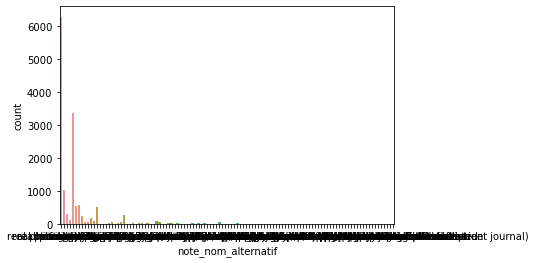

In [28]:
sns.countplot(x='note_nom_alternatif', data=df)

d:\docs\cours\m1\hmin232\env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


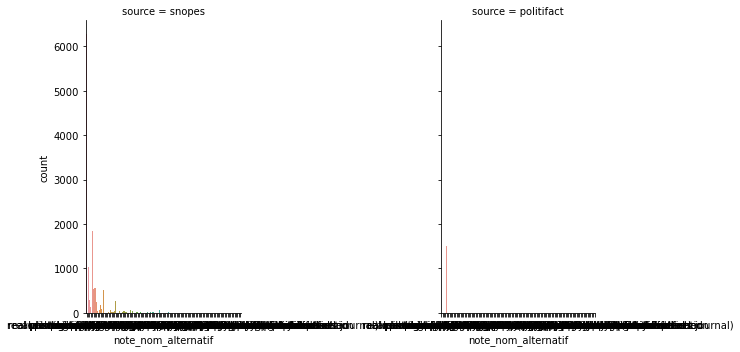

In [29]:
sns.factorplot(x='note_nom_alternatif', col='source', kind='count', data=df)

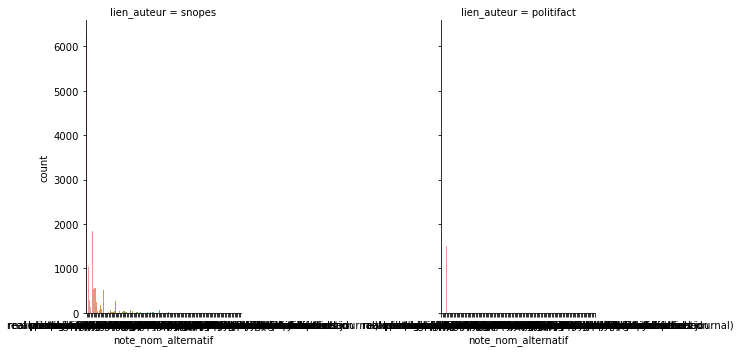

In [30]:
sns.factorplot(x='note_nom_alternatif', col='lien_auteur', kind='count', data=df)

In [25]:
def toLower(mot) :
    return str(mot).lower()

In [26]:
df["note_nom_alternatif"] = df["note_nom_alternatif"].apply(toLower)

In [27]:
display(df.sample(5))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
922,5922,snopes,The state of California ignored structural issues with the Oroville dam and paid for programs to...,2017-02-16,snopes,https://www.snopes.com/fact-check/california-divert-dam-repair-funds/,"On 15 February 2017, the web site ConservativeDailyPost.com published an inaccurate story bearin...","http://www.fairus.org/DocServer/research-pub/CaliforniaCostStudy_2014-v3.pdf,https://www.snopes....","california, disasters, flooding, undocumented immigrants",Did California Divert Dam Repair Funds to Programs for ‘Illegals’?,mostly false
3602,13602,snopes,A cyber-security bill passed by Congress will violate constitutional protections.,2013-04-22,snopes,https://www.snopes.com/fact-check/cispa/,Claim: A cyber-security bill passed by Congress will violate constitutional protections.Claim:...,http://democrats.intelligence.house.gov/sites/democrats.intelligence.house.gov/files/documents/C...,"ASP Article, Audi R8",Cyber Intelligence Sharing and Protection Act (CISPA).,mixture
1803,1803,snopes,Laws in some areas limit trick-or-treating to children 12 and younger.,2018-10-11,snopes,https://www.snopes.com/fact-check/trick-or-treat-age-limit/,One of the common elements of the Halloween night trick-or-treat tradition is adults’ grumbling ...,https://library.municode.com/va/chesapeake/codes/code_of_ordinances?nodeId=PTIICOOR_CH46OFMIPR_A...,halloween,Does a Municipal Code Limit Trick-or-Treating to Children 12 and Younger?,mixture
2365,7365,snopes,"Officials at Ramapo College forced students to change an """"offensive"""" patriotic barbecue event.",2016-09-23,snopes,https://www.snopes.com/fact-check/college-threatened-to-cancel-offensive-america-themed-bbq-event/,"On 20 September 2016, a college-themed publication called Campus Reform published a story report...","http://www.campusreform.org/?ID=8153,https://www.facebook.com/RamapoCollege/posts/10154050598029426","college, education, fake outrage, patriotism",College Threatened to Cancel ‘Offensive’ America-Themed BBQ Event?,unproven
387,10387,snopes,Artesa Vineyards and Winery is planning to cut down 154 acres of California Redwoods in order to...,2015-04-28,snopes,https://www.snopes.com/fact-check/redwood-whinery/,Claim: Artesa Vineyards and Winery is planning to cut down 154 acres of California Redwoods in...,"http://www.winespectator.com/webfeature/show/id/49378,http://www.winespectator.com/webfeature/sh...",ASP Article,Spanish Winemaker Obtains Permission to Cut Down 154 Acres of California Redwoods,outdated


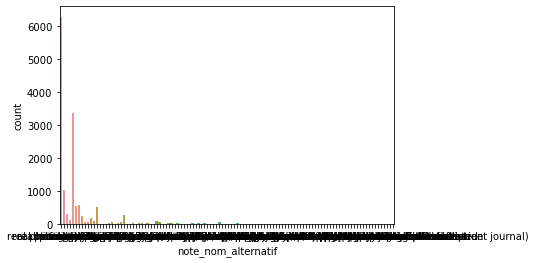

In [31]:
sns.countplot(x='note_nom_alternatif', data=df)

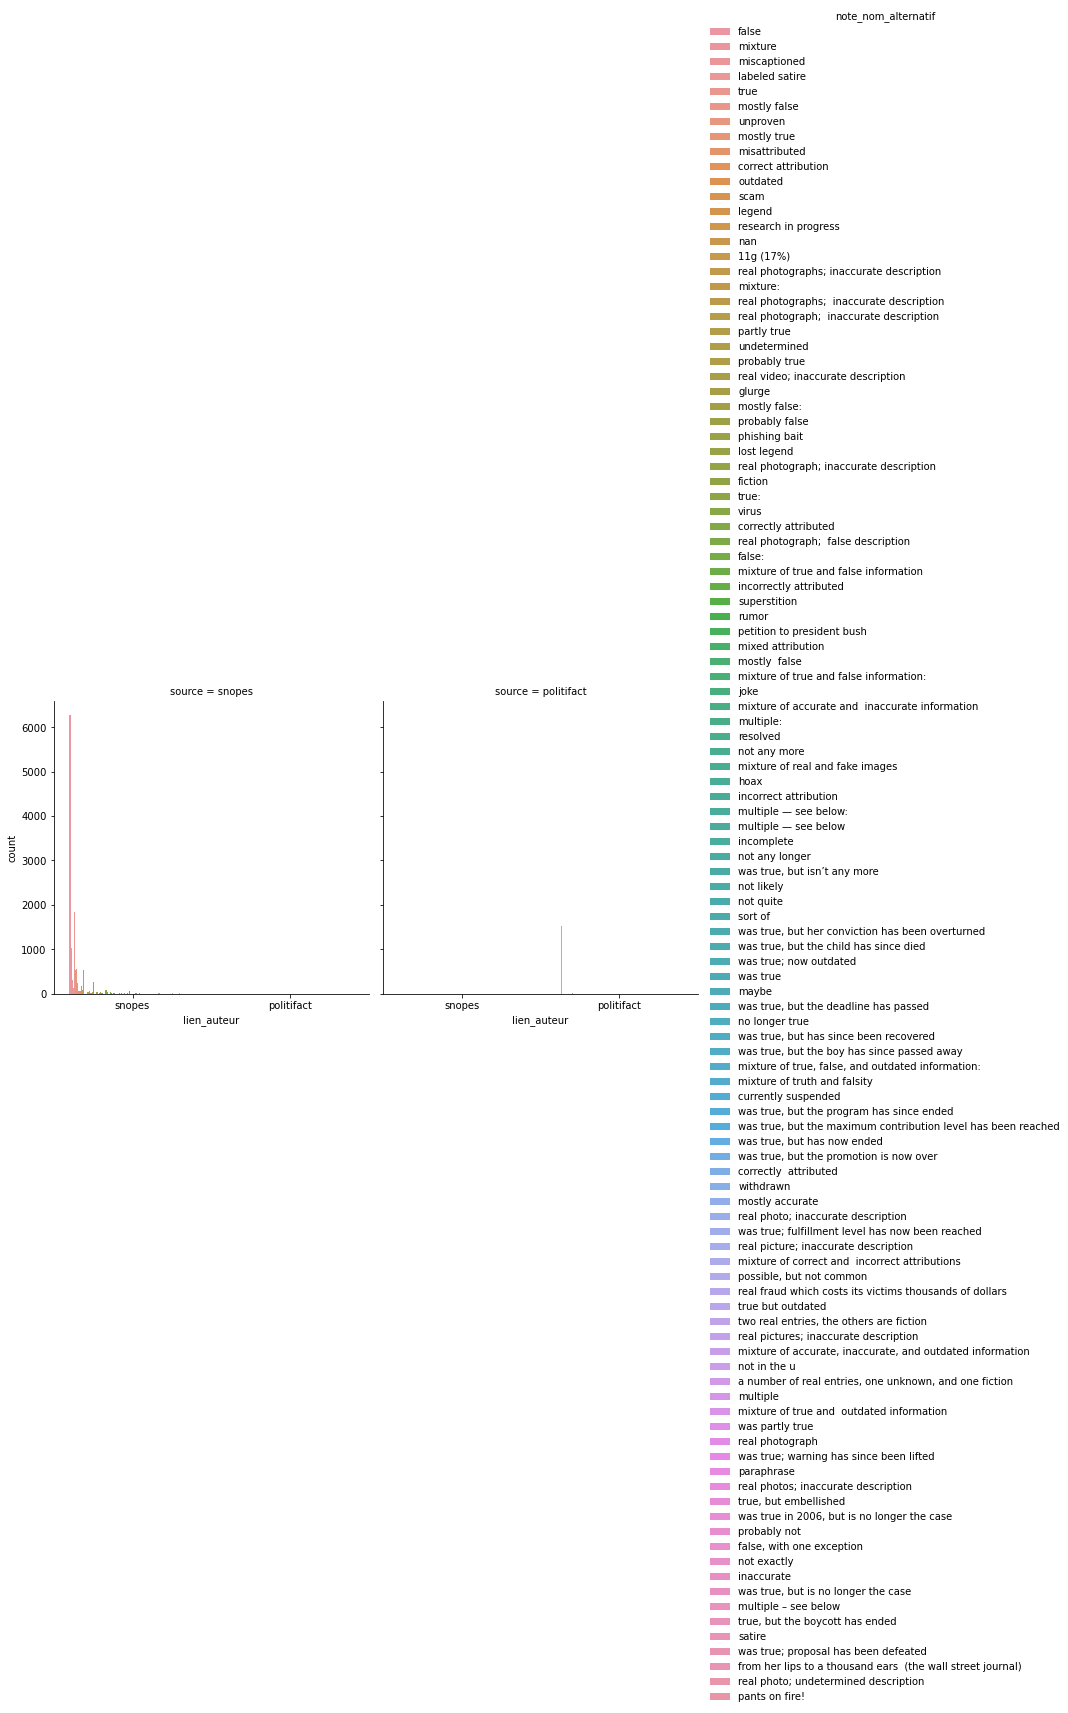

In [32]:
sns.factorplot('lien_auteur',
data=df,
kind='count',
hue='note_nom_alternatif',
col='source')

In [33]:
df2=df.copy()

In [35]:
df2=df2.dropna()
display(df2.sample(5))
display(df2.info())
display(df2.shape)

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
2450,17450,snopes,Letter of resignation submitted to Secretary of State Colin L. Powell by a U.S. diplomat.,2007-09-13,snopes,https://www.snopes.com/fact-check/us-diplomats-letter-of-resignation/,Claim: Letter of resignation submitted to Secretary of State Colin L. Powell by a U.S. diploma...,http://www.nytimes.com/2003/02/27/international/27WEB-TNAT.html?pagewanted=1,ASP Article,U.S. Diplomat’s Letter of Resignation,true
3973,8973,snopes,Students at Bowdoin College in Maine were offered counseling because a party involved mini sombr...,2016-03-08,snopes,https://www.snopes.com/fact-check/bowdoin-mini-sombrero-controversy/,"On 6 March 2016, British web site The Independent published an article that reported students at...",http://www.independent.co.uk/news/world/americas/students-offered-counselling-over-small-sombrer...,"bowdoin college, counseling, imaginary offended people, mini sombreros, political correctness, s...",Bowdoin Mini Sombrero Controversy,mostly false
2071,12071,snopes,Former President George H.W. Bush has died of food poisoning.,2014-07-23,snopes,https://www.snopes.com/fact-check/george-hw-bush-death-hoax/,Claim: Former President George H.W. Bush has died of food poisoning.Claim:Claim:FALSEFALSEFALS...,"http://www.today.com/news/george-h-w-bush-skydive-thats-one-way-celebrate-90-2D79795298,http://w...","ASP Article, hoaxes",George H.W. Bush Death Hoax,false
3924,8924,snopes,"Donald Trump said in the good old days, protesters were harshly dealt with and carried away on s...",2016-03-14,snopes,https://www.snopes.com/fact-check/donald-trump-kent-state/,"On 11 March 2016, the campaign of Republican presidential candidate Donald Trump was jarred when...",http://www.chicagotribune.com/news/local/politics/ct-illinois-primary-election-south-side-irish-...,donald trump,Donald Trump ‘Protester’ Quote/Kent State Comparison,mostly true
426,10426,snopes,"Kristen Bell is the most tattooed actress in Hollywood, with more than 200 facial and body tattoos.",2015-02-10,snopes,https://www.snopes.com/fact-check/a-body-of-lies/,"Claim: Kristen Bell is the most tattooed actress in Hollywood, with more than 200 facial and b...","http://963theblaze.com/kristen-bell-covered-in-tattoos-video/,http://www.funnyordie.com/videos/d...","ASP Article, Not Necessarily The News",Kristen Bell: Most Tattooed Actress?,false


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11361 entries, 8 to 4998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    11361 non-null  int64 
 1   lien_auteur           11361 non-null  object
 2   reclamation_examinee  11361 non-null  object
 3   date_examination      11361 non-null  object
 4   source                11361 non-null  object
 5   lien                  11361 non-null  object
 6   contenu               11361 non-null  object
 7   extra_lien_reference  11361 non-null  object
 8   extra_tags            11361 non-null  object
 9   extra_titre           11361 non-null  object
 10  note_nom_alternatif   11361 non-null  object
dtypes: int64(1), object(10)
memory usage: 621.3+ KB


None

(11361, 11)

In [40]:
df21 = df2[df2.note_nom_alternatif == 'false']
df22 = df2[df2.note_nom_alternatif == 'true']
df23 = df2[df2.note_nom_alternatif == 'mixture']

df3 = pd.concat([df21, df22])
df3 = pd.concat([df3,df23])

In [41]:
df3.sample(5)

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
3260,3260,snopes,A set of images show President Barack Obama and President Donald Trump in the aftermath of vario...,2018-02-19,snopes,https://www.snopes.com/fact-check/presidential-responses-school-shootings/,"A photograph is worth a thousand words, or so the saying goes. Unfortunately, in the disinformat...","https://www.snopes.com/2018/02/15/parkland-high-rumors-hoaxes-conspiracy-theories/,https://www.n...","connecticut, florida, mass shootings, obama administration, parkland shooting, sandy hook, schoo...",Presidential Responses to School Shootings?,mixture
2388,12388,snopes,The sap of the giant hogweed plant can cause severe skin and eye irritation.,2014-04-17,snopes,https://www.snopes.com/fact-check/giant-hogweed-toxicity-warning/,"In July 2013, many in the online world became aware of the hazard posed by the giant hogweed via...","/horrors/poison/oleander.asp,/critters/crusader/sagopalm.asp,http://www.dec.ny.gov/animals/39809...",Toxin Du Jour,Giant Hogweed Toxicity Warning,true
3873,8873,snopes,"A video shows the """"moment the explosion"""" of a terrorist attack occurred in the Brussels airpor...",2016-03-22,snopes,https://www.snopes.com/fact-check/brussels-attack-video-fake/,"On 22 March 2016, a terrorist attack involving explosives detonated at an airport and a subway s...",http://www.msn.com/en-us/news/world/attacks-on-brussels-airport-metro-kill-26/ar-BBqLxXn?ocid=an...,brussels attack,Misidentified Footage Circulated as ‘Brussels Attack Video’,false
4121,14121,snopes,A photograph shows a horse whose coat spells out the word 'horse.',2012-05-22,snopes,https://www.snopes.com/fact-check/horse-horse/,Patterns in the colors of various animals’ hair or fur can sometimes form what humans perceive a...,"/photos/animals/heartkun.asp,http://www.worth1000.com/,graphics/horsehorse2.jpg","animals, designcrowd, worth1000",Does This Horse Spell ‘Horse’?,false
2870,17870,snopes,Truck driver involved in capture of sniper suspects prayed with other truckers that the sniper w...,2007-03-09,snopes,https://www.snopes.com/fact-check/gun-prey/,Claim: Truck driver involved in capture of sniper suspects prayed with other truckers that the...,"http://www.foxnews.com/story/0,2933,66702,00.html",ASP Article,Gun Prey,true


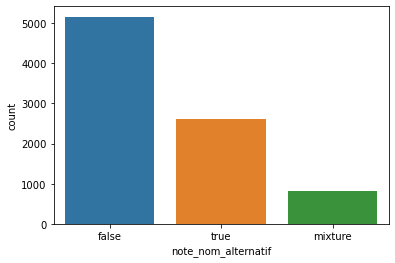

In [42]:
sns.countplot(x='note_nom_alternatif', data=df3)


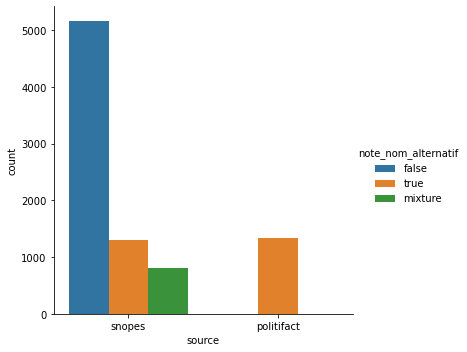

In [44]:
sns.factorplot('source',
data=df3,
kind='count',
hue='note_nom_alternatif')

In [65]:
class_label_encoder = LabelEncoder()
# transformation

df3["source"]=class_label_encoder.fit_transform(df3["source"])

In [66]:
display(df3.sample(5))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
4773,1298,politifact,"Ronald Reagan """"raised taxes in 1982, 1984, 1985, 1986 and 1987.""""",2019-10-14,0,http://www.politifact.com/virginia/statements/2012/jun/25/gerry-connolly/rep-gerry-connolly-says...,"U.S. Rep. Gerry Connolly, D-11th, recently invoked the name of Ronald Reagan to drum up support ...","https://www.youtube.com/watch?feature=player_embedded&v=jrYJp1IVAmU,https://www.politifact.com/t...","Deficit,Taxes",Rep. Gerry Connolly says Reagan raised taxes during five years of presidency,true
873,5873,snopes,"Thousands of Marines applied for White House detail after Trump became president, and none appli...",2017-02-24,1,https://www.snopes.com/fact-check/marine-white-house-detail/,"On 22 February 2017, the Facebook group “Conservative Veterans for America” shared an image macr...","https://archive.is/BgpRO,https://www.snopes.com/tachyon/2017/02/marines-white-house.jpg,http://f...","barack obama, donald trump",Did Thousands of Marines Apply for White House Detail After Trump Became President?,false
4582,14582,snopes,The drug Premarin is produced from the urine of pregnant horses.,2007-08-01,1,https://www.snopes.com/fact-check/premarin/,Claim: The drug Premarin is produced from the urine of pregnant horses. Claim:Claim:Status: ...,"http://www.menopause-online.com/,http://web.archive.org/web/20020124075843/http://www.aoa.gov/ao...","ASP Article, drugs",Premarin,true
3401,18401,snopes,Bodies of workmen are entombed in Hoover Dam.,1999-10-01,1,https://www.snopes.com/fact-check/hoover-dam-bodies/,"Although a startling number of workmen were killed in the construction of Hoover Dam (1931-36), ...","https://www.usbr.gov/lc/hooverdam/history/essays/fatal.html,http://www.fortpeckdam.com/historypa...",freakish fatalities,Hoover Dam Entombments,false
3606,3606,snopes,"Former Presidents Barack Obama, Bill Clinton, and George W. Bush mocked President Trump on Twitt...",2018-01-09,1,https://www.snopes.com/fact-check/former-presidents-mocked-trump-about-his-first-try-tweet/,"In January 2018, shortly after the publication of the book Fire and Fury: Inside the Trump White...","https://twitter.com/realDonaldTrump/status/949618475877765120?ref_src=twsrc%5Etfw,https://twitte...","bush, clinton, Obama, president trump, presidential campaign",Three Former Presidents Mocked Trump on Twitter?,false


d:\docs\cours\m1\hmin232\env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


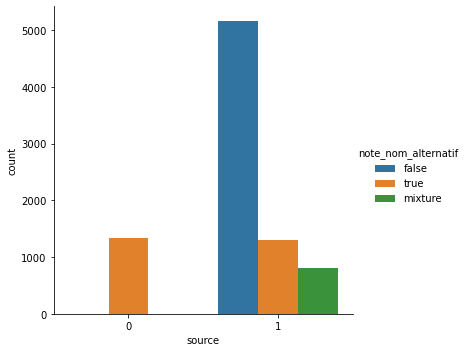

In [67]:
sns.factorplot('source',
data=df3,
kind='count',
hue='note_nom_alternatif')

In [68]:
del df3["lien_auteur"]
del df3["id"]
del df3["lien"]
del df3["extra_lien_reference"]

In [69]:
display(df3.sample(5))

,reclamation_examinee,date_examination,source,contenu,extra_tags,extra_titre,note_nom_alternatif
3916,"Under Donald Trump's tax plan, """"the top 0.1 percent of taxpayers -- people earning multiple mil...",2019-10-11,0,"For being Hillary Clinton surrogates, two Wisconsin lawmakers sounded rather like Bernie Sanders...","Income,Taxes,Wealth","Top 0.1% would be big winner under Donald Trump's tax plan, Wisconsin Hillary Clinton supporter ...",true
2634,"A Muslim man named """"Mike Alig-Juzfahrted"""" was appointed superintendent of Atlanta Public Schools.",2018-05-24,1,"In May 2018, “satirical” blog America’s Last Line of Defense seized on a picture from an actual ...","america's last line of defense, last line of defense",Was a Muslim Educator Named Superintendent of Atlanta’s Schools?,false
1273,A serial killer/rapist is luring women with $5 bills they’ve ‘dropped.’,2009-03-17,1,Claim: A serial killer/rapist is luring women with $5 bills they’ve ‘dropped.’ Claim:Claim:FAL...,ASP Article,Serial Killer/ Rapist Trick,false
619,Photographs show a collection of houses built in unusual places.,2007-06-25,1,Most e-mailed collections of unusual “Are these real?” type pictures usually consist of either a...,"Architecture, photoshop",Are These Unusual Houses Real?,mixture
437,Actor Russell Johnson of Gilligan’s Island fame has been identified as the Zodiac Killer.,2015-04-22,1,Claim: Actor Russell Johnson of Gilligan’s Island fame has been identified as the Zodiac Kille...,"ASP Article, Not Necessarily The News",Hollywood Shocker: ‘Gilligan’s Island’ Star Turns Out to Be Zodiac Killer,false


In [45]:
array = df3.values
X = array[:,3:4]
y = array[:,10]

In [51]:
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=validation_size,
random_state=seed,test_size=testsize)

In [55]:
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)
print('\n accuracy :',
accuracy_score(result, y_test),'\n')

ValueError: could not convert string to float: 'snopes'

In [62]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFO', RandomForestClassifier()))

In [63]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

KNN: nan (nan)
CART: nan (nan)
NB: nan (nan)
SVM: nan (nan)
RFO: nan (nan)


d:\docs\cours\m1\hmin232\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'snopes'

  warnings.warn("Estimator fit failed. The score on this train-test"
d:\docs\cours\m1\hmin232\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'snopes'

  warnings.warn("Estimator fit failed. The score on this train-test"
d:\docs\cours\m1\hmin232\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'snopes'

  warnings.warn("Estimator f